#BIBLIO

In [ ]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("moments")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(moments)

#DANE

In [ ]:
nba <- read.csv("nba_height.csv", header = TRUE) 
nba <- read.table("nba_height.csv", head = TRUE, sep = ";", dec = ".")

In [ ]:
dekada1 <-nba[-c(3973:11145),]

In [ ]:
dekada2 <- nba[-c(1:6678),]

In [ ]:
height1 <- dekada1$height
height2 <- dekada2$height
height <- nba$height

In [ ]:
length(height1)
length(height2)
length(height2)-length(height1)

[1] 3972

[1] 4467

[1] 495

#FUNKCJE

In [ ]:
rozstep <- function(X){
  return (max(X)-min(X))
}

In [ ]:
wsp_zmiennosci <- function(X){
  return (sd(X)/(mean(X)) * 100)
}

In [ ]:
średnia_arytmetyczna <-function(dane){
    return(sum(dane)/length(dane))
} 

In [ ]:
średnia_harmoniczna <- function(dane){
    return(length(dane)/sum(1/dane)) 
}

In [ ]:
średnia_geometryczna <- function(dane){
    return(prod(dane^(1/length(dane))))
}

In [ ]:
średnia_winsorowska <- function(dane, k){
    n <- length(dane)
    posortowane = sort(dane)
    koniec <- n-k-1
    początek <- k+1
    obcięte = posortowane[początek:koniec]
    return(1/n*((k+1)*posortowane[k+1] + sum(obcięte)+ (k+1)*posortowane[n-k]))
}

In [ ]:
średnia_ucinana <- function(dane, k){
    n <- length(dane)
    koniec <- n-k
    początek <- k+1
    posortowane = sort(dane)
    obcięte = posortowane[początek:koniec]
    return(1/(n-2*k)*sum(obcięte))
}

In [ ]:
niebieski = "#00077A"
czerwony = "#B7052D"
zielony = "#146923"
zolty = "#E3AE10"
rozowy ="#FA95DF"

#WYKRESY

###HISTOGRAMY

Saving 6.67 x 6.67 in image



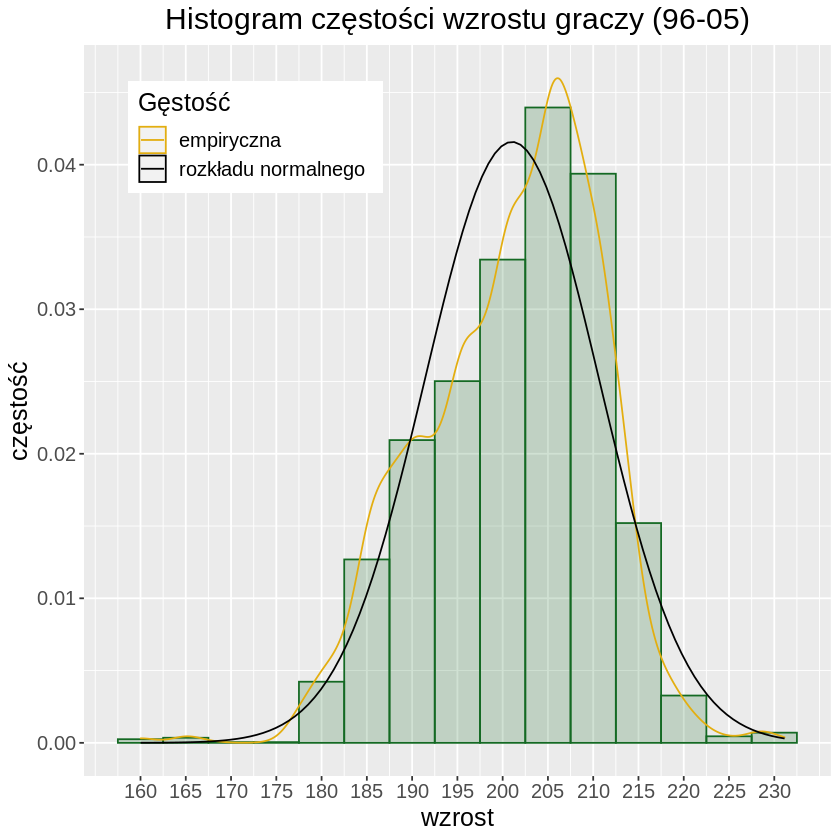

In [ ]:
colors <- c("empiryczna" = zolty, "rozkładu normalnego" = 'black')
ggplot(dekada1, aes(x=height1)) + 
    geom_histogram(aes(y=..density..), colour=zielony, fill=zielony, alpha=.2, binwidth=5) +
    geom_density(aes(colour='empiryczna')) +
    labs(title="Histogram częstości wzrostu graczy (96-05)", x="wzrost", y="częstość") +
    stat_function(fun=dnorm, args=list(mean=mean(height1), sd=sd(height1)), aes(colour ='rozkładu normalnego')) +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks=seq(0,0.06,0.01)) +
    scale_x_continuous(breaks=seq(160,230,5)) +
    theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual('Gęstość', values = colors)
    ggsave("hist_czest_96.png")

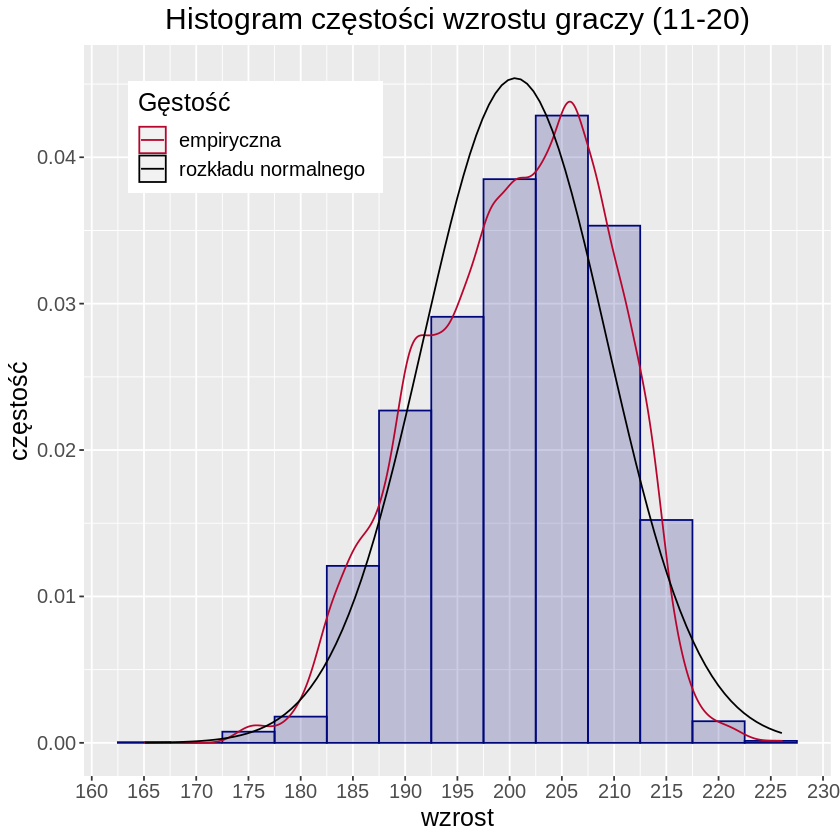

In [ ]:
colors <- c("empiryczna" = czerwony, "rozkładu normalnego" = 'black')
ggplot(dekada2, aes(x=height2)) + 
    geom_histogram(aes(y=..density..), colour=niebieski, fill=niebieski, alpha=.2, binwidth=5) +
    geom_density(aes(colour='empiryczna')) +
    stat_function(fun=dnorm, args=list(mean=mean(height2), sd=sd(height2)), aes(colour ='rozkładu normalnego')) +
    labs(title="Histogram częstości wzrostu graczy (11-20)", x="wzrost", y="częstość") +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks=seq(0,0.06,0.01)) +
    scale_x_continuous(breaks=seq(160,230,5)) +
    theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual('Gęstość', values = colors)

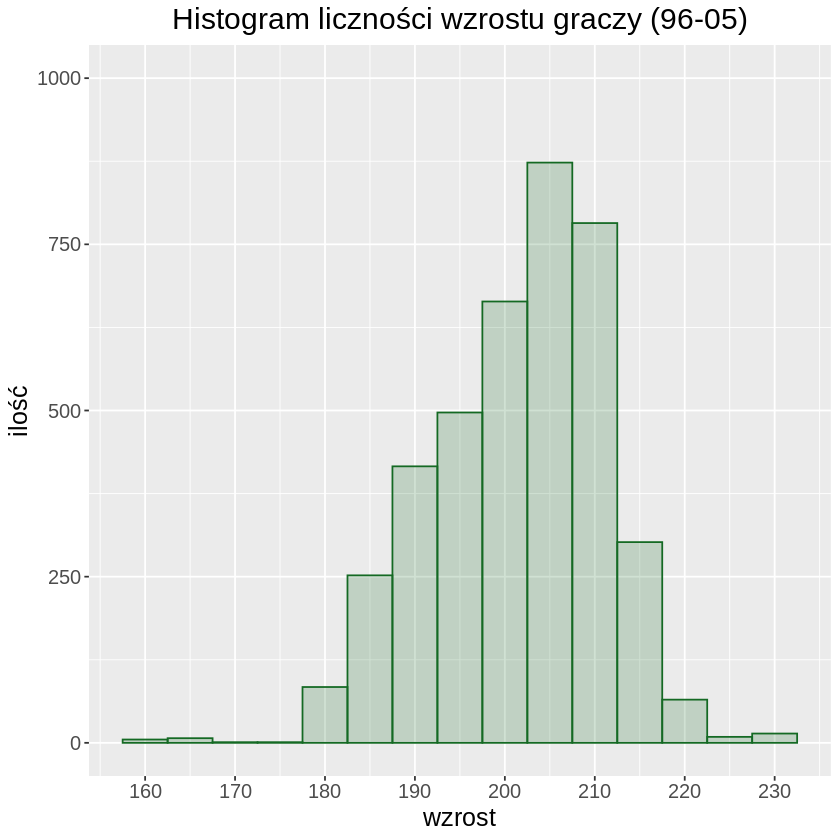

In [ ]:
ggplot(dekada1, aes(x=height1)) + 
    geom_histogram(colour=zielony, fill=zielony, alpha=.2, binwidth=5) +
    labs(title="Histogram liczności wzrostu graczy (96-05)", x="wzrost", y="ilość") +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(limits=c(0,1000)) +
    scale_x_continuous(breaks=seq(0,250,10))

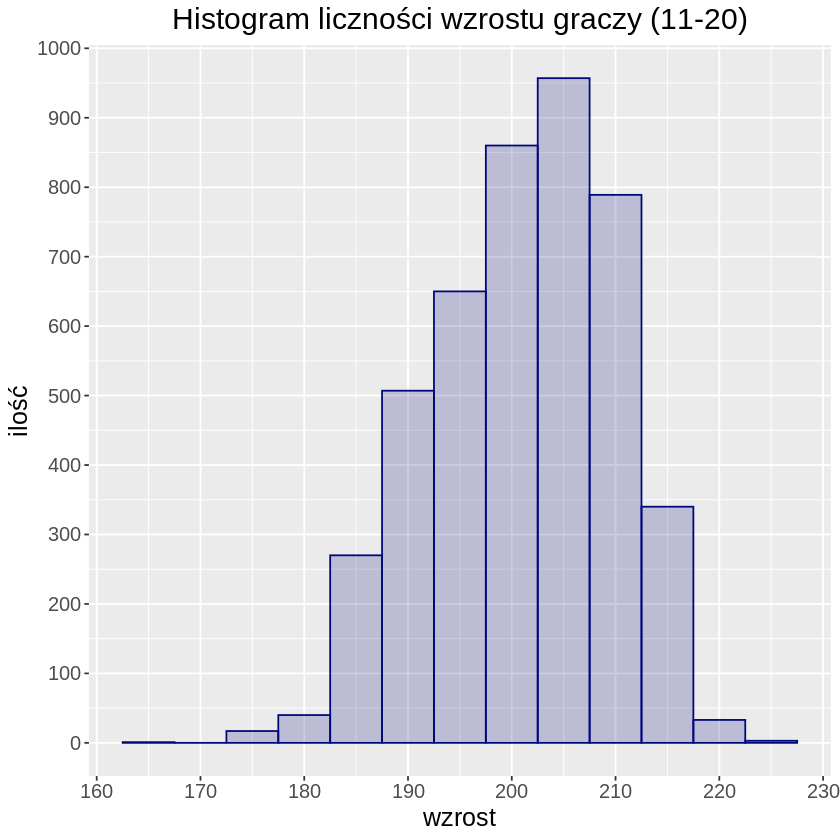

In [ ]:
ggplot(dekada2, aes(x=height2)) + 
    geom_histogram(colour=niebieski, fill=niebieski, alpha=.2, binwidth=5) +
    labs(title="Histogram liczności wzrostu graczy (11-20)", x="wzrost", y="ilość") +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_y_continuous(breaks=seq(0,1000,100)) +
    scale_x_continuous(breaks=seq(0,250,10))

##DYSTRYBUANTY EMP

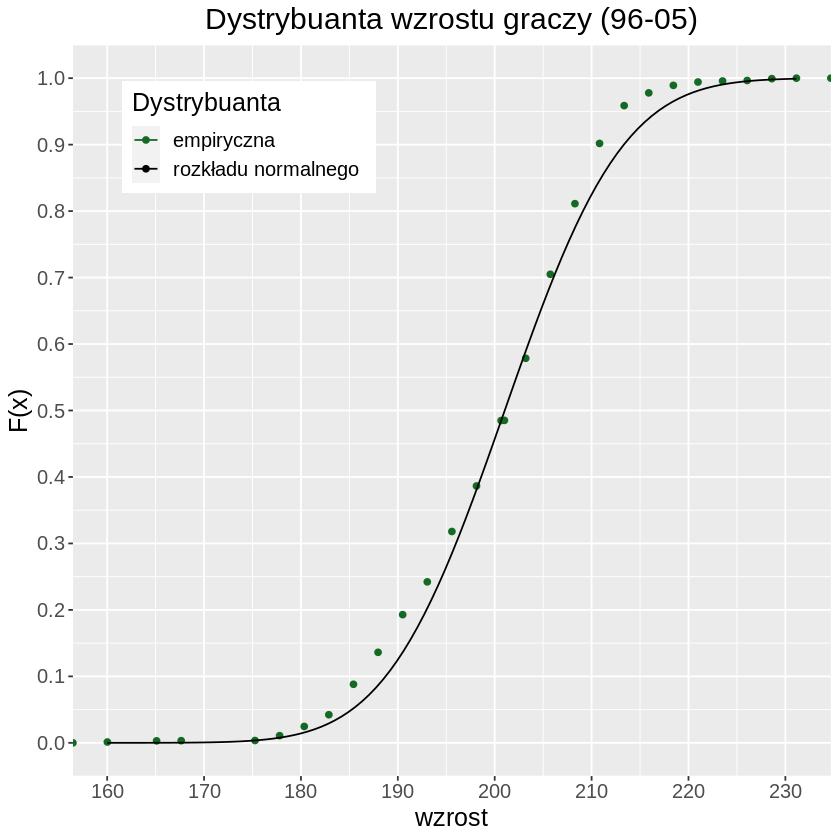

In [ ]:
colors <- c("empiryczna" = zielony, "rozkładu normalnego" = 'black')
ggplot(dekada1, aes(height1)) +
  stat_ecdf(geom = "point", aes(colour ='empiryczna')) +
  labs(title="Dystrybuanta wzrostu graczy (96-05)", x="wzrost", y="F(x)") +
  theme(text = element_text(size=15, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks=seq(0,1,0.1)) +
  scale_x_continuous(breaks=seq(0,250,10)) +
  stat_function(fun=pnorm, args=list(mean=mean(height1), sd=sd(height1)), aes(colour='rozkładu normalnego')) +
  theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual("Dystrybuanta",values = colors)



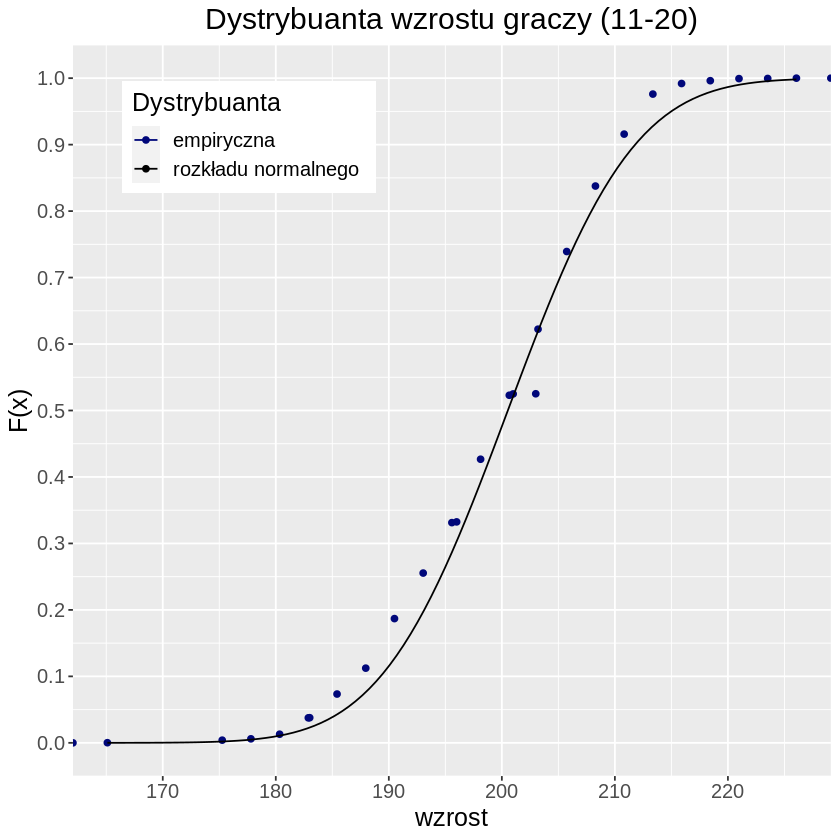

In [ ]:
 colors <- c("empiryczna" = niebieski, "rozkładu normalnego" = 'black')
 ggplot(dekada2, aes(height2)) +
  stat_ecdf(geom = "point", aes(colour ='empiryczna')) +
  labs(title="Dystrybuanta wzrostu graczy (11-20)", x="wzrost", y="F(x)") +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
   scale_y_continuous(breaks=seq(0,1,0.1)) +
  scale_x_continuous(breaks=seq(0,250,10)) +
  stat_function(fun=pnorm, args=list(mean=mean(height2), sd=sd(height2)),  aes(colour='rozkładu normalnego')) +
  theme(
    legend.position = c(.40, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)) +
    scale_color_manual("Dystrybuanta",values = colors)

##BOXPLOT

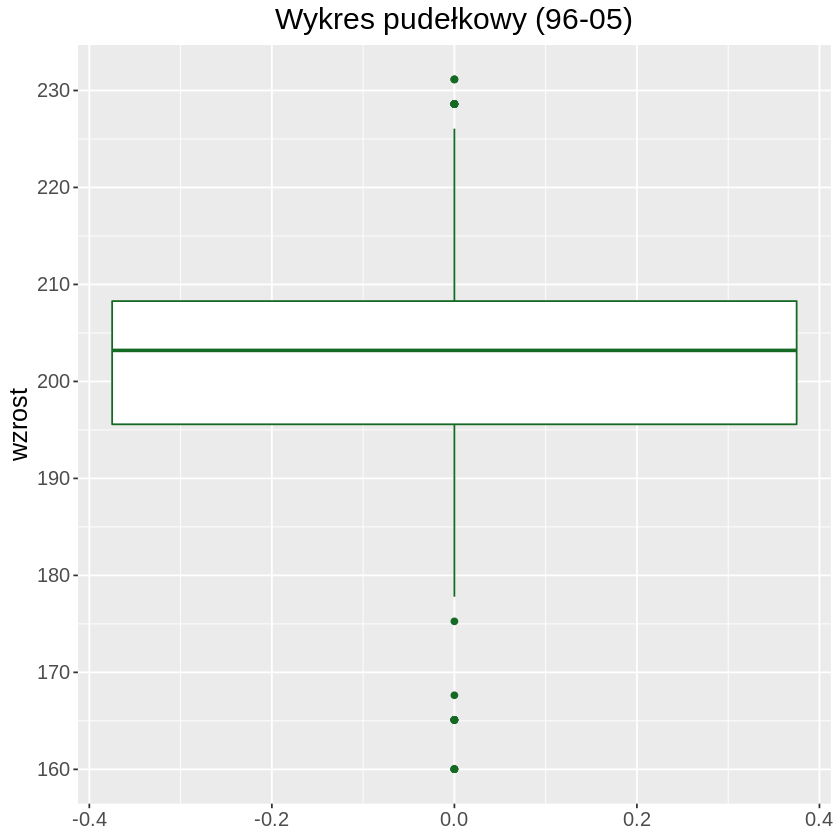

In [ ]:
ggplot(dekada1, aes(x = height1)) +
  geom_boxplot(col=zielony) +
  labs(title="Wykres pudełkowy (96-05)", x="wzrost") +
  coord_flip() +
  theme(text = element_text(size=15, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5))  +
  scale_x_continuous(breaks=seq(0,250,10))

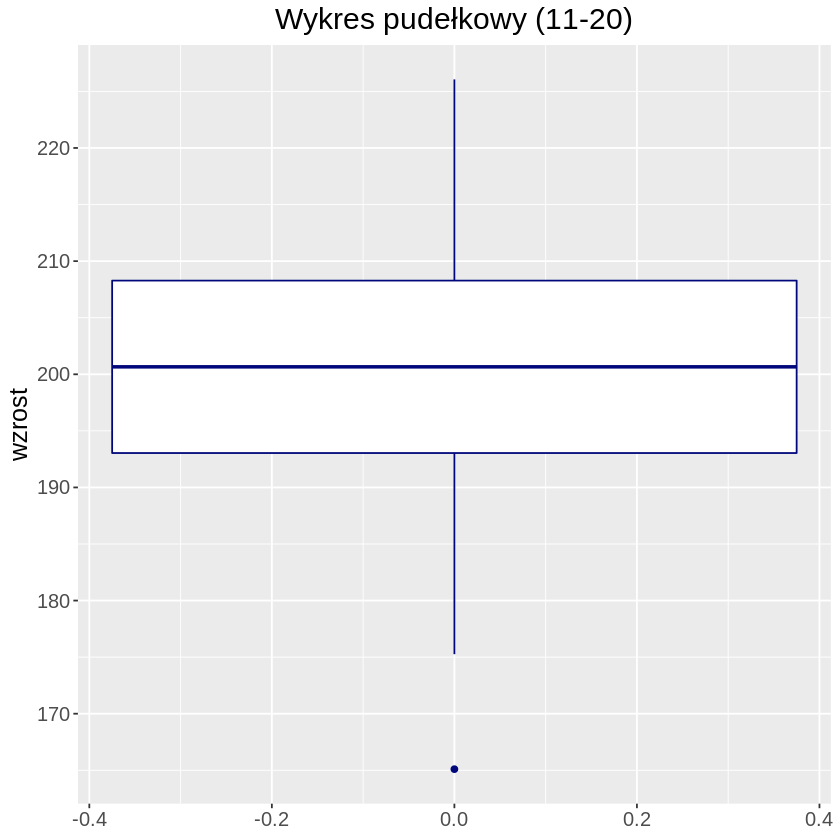

In [ ]:
ggplot(dekada2, aes(x = height2)) +
  geom_boxplot(col=niebieski) +
  labs(title="Wykres pudełkowy (11-20)", x="wzrost") +
  coord_flip() +
  theme(text = element_text(size=15, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_x_continuous(breaks=seq(0,250,10))

##QQPLOTY

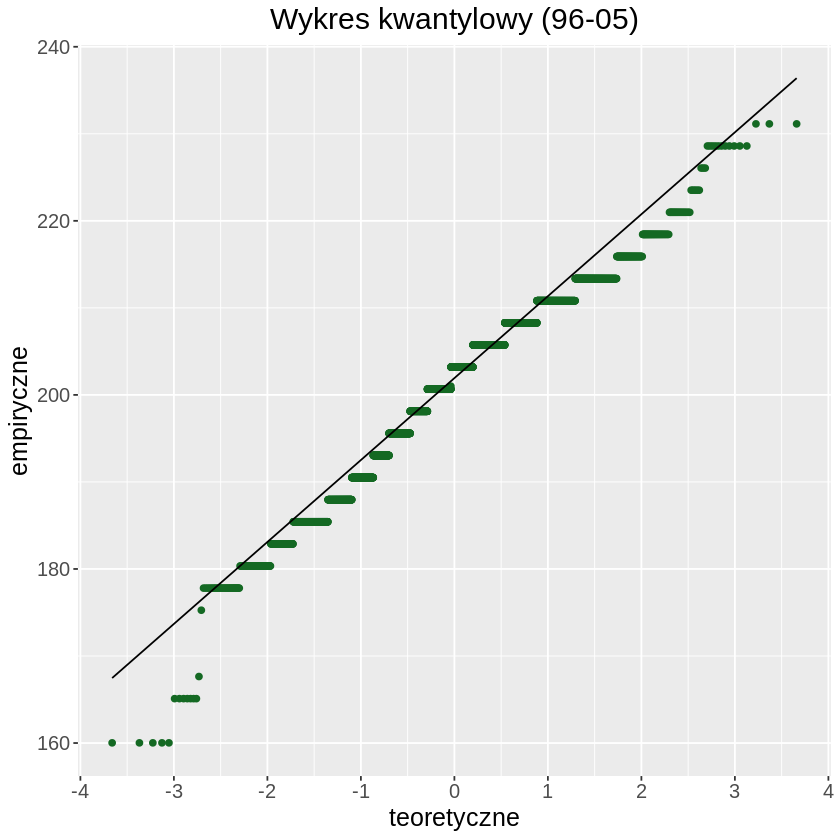

In [ ]:
ggplot(dekada1, aes(sample = height1)) +
  stat_qq(col=zielony) +
  stat_qq_line() +
  labs(title="Wykres kwantylowy (96-05)", x='teoretyczne', y='empiryczne') +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
   scale_x_continuous(breaks=seq(-4,4,1)) +
  scale_y_continuous(breaks=seq(0,250,20)) 

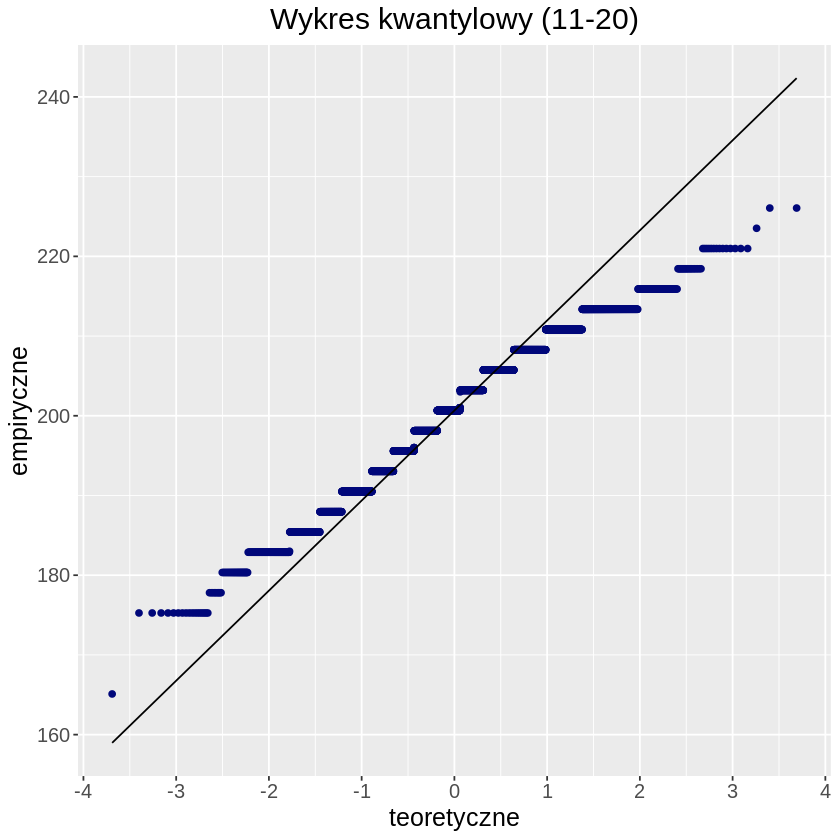

In [ ]:
ggplot(dekada2, aes(sample = height2)) +
  stat_qq(col=niebieski) +
  stat_qq_line() +
  labs(title="Wykres kwantylowy (11-20)", x='teoretyczne', y='empiryczne') +
    theme(text = element_text(size=15, family="Arial")) +
    theme(plot.title = element_text(hjust = 0.5)) +
   scale_x_continuous(breaks=seq(-4,4,1)) +
  scale_y_continuous(breaks=seq(0,250,20)) 

##STATYSTYKI (to chyba bd w tabelce)

In [ ]:
mean(height1)
mean(height2)

[1] 201.0323

[1] 200.5287

In [ ]:
sd(height1)
sd(height2)

[1] 9.594384

[1] 8.786433

In [ ]:
var(height1)
var(height2)

[1] 92.0522

[1] 77.2014

In [ ]:
median(height1)
median(height2)

[1] 203.2

[1] 200.66

In [ ]:
quantile(height1)
quantile(height2)

0%    25%    50%    75%   100% 
160.02 195.58 203.20 208.28 231.14

0%    25%    50%    75%   100% 
165.10 193.04 200.66 208.28 226.06

In [ ]:
rozstep(height1)
rozstep(height2)

[1] 71.12

[1] 60.96

In [ ]:
IQR(height1)
IQR(height2)

[1] 12.7

[1] 15.24

In [ ]:
wsp_zmiennosci(height1)
wsp_zmiennosci(height2)


[1] 4.772559

[1] 4.381635

In [ ]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’




In [ ]:
cv(height1)

ERROR: ignored

##ŚREDNIE

In [ ]:
średnia_arytmetyczna(height1)
średnia_arytmetyczna(height2)

[1] 201.0323

[1] 200.5287

In [ ]:
średnia_harmoniczna(height1)
średnia_harmoniczna(height2)

[1] 200.5628

[1] 200.1374

In [ ]:
średnia_geometryczna(height1)
średnia_geometryczna(height2)

[1] 200.7996

[1] 200.3341

In [ ]:
średnia_winsorowska(height1, 300)
średnia_winsorowska(height2, 300)

[1] 201.0994

[1] 200.6332

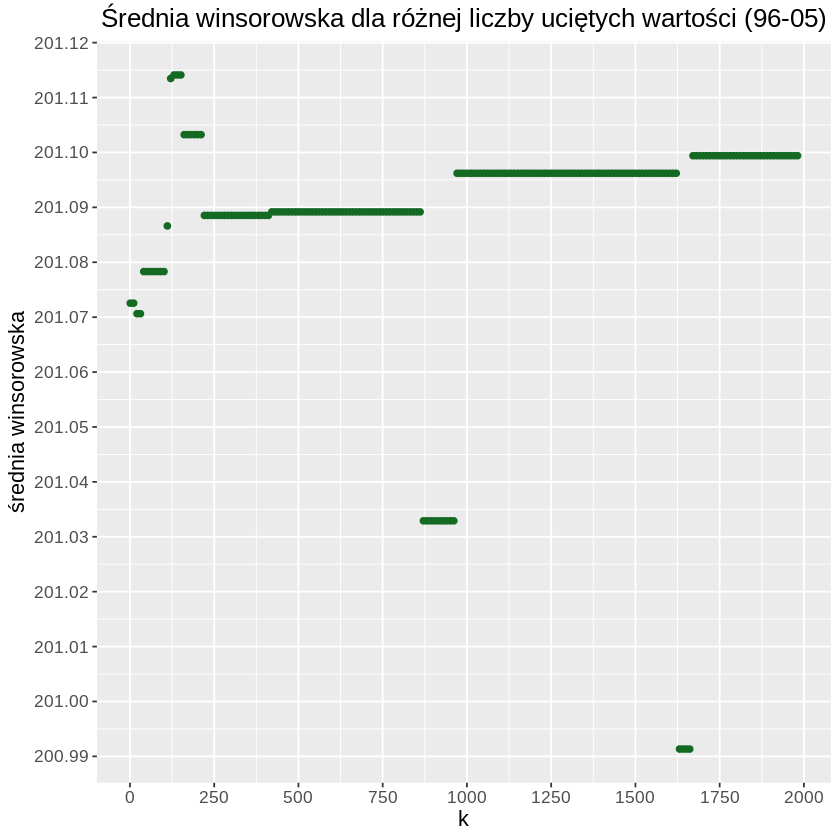

In [ ]:
k <- seq(1,floor(length(height1)/2),10)
y_axis_wins <- numeric()
i <- 1
for (n in 1:length(k)) {
    y_axis_wins[i]=średnia_winsorowska(height1,i)
    i <- i+1
  }

df <- data.frame(x = k, 
                 y = y_axis_wins)
ggplot(df, aes(x=x, y=y)) +
  geom_point(col=zielony) +
  labs(title="Średnia winsorowska dla różnej liczby uciętych wartości (96-05)", x="k", y="średnia winsorowska") +
  theme(text = element_text(size=13, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks=seq(200,202,0.01)) +
  scale_x_continuous(breaks=seq(0,3000,250)) 

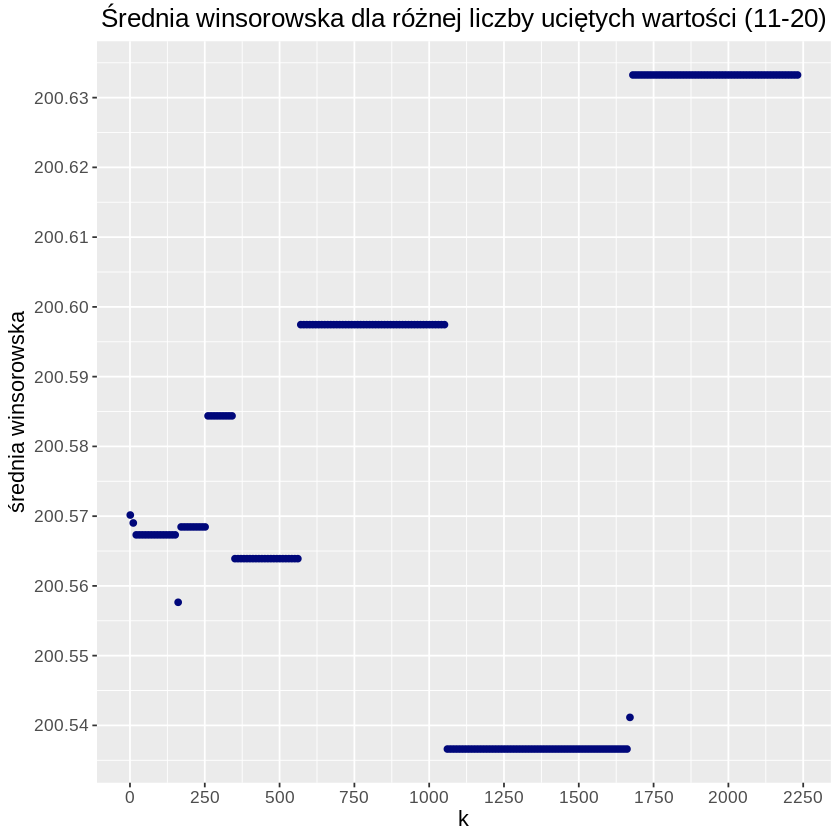

In [ ]:
k <- seq(1,floor(length(height2)/2),10)
y_axis_wins <- numeric()
i <- 1
for (n in 1:length(k)) {
    y_axis_wins[i]=średnia_winsorowska(height2,i)
    i <- i+1
  }

df <- data.frame(x = k, 
                 y = y_axis_wins)
ggplot(df, aes(x=x, y=y)) +
  geom_point(col=niebieski) +
  labs(title="Średnia winsorowska dla różnej liczby uciętych wartości (11-20)", x="k", y="średnia winsorowska") +
  theme(text = element_text(size=13, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks=seq(200,201,0.01)) +
  scale_x_continuous(breaks=seq(0,3000,250)) 


In [ ]:
średnia_ucinana(height1, 300)
średnia_ucinana(height2, 300)

[1] 201.3486

[1] 200.7782

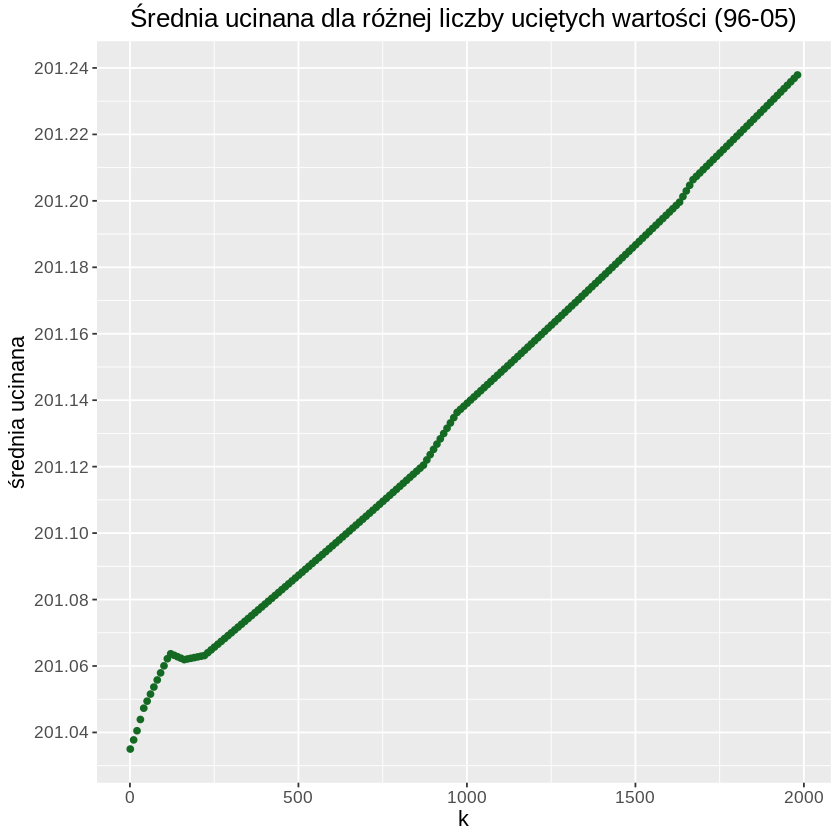

In [ ]:
k <- seq(1,floor(length(height1)/2),10)
y_axis_uc <- numeric()
i <- 1
for (n in 1:length(k)) {
    y_axis_uc[i]=średnia_ucinana(height1,i)
    i <- i+1
  }

df <- data.frame(x = k, 
                 y = y_axis_uc)
ggplot(df, aes(x=x, y=y)) +
  geom_point(col=zielony) +
  labs(title="Średnia ucinana dla różnej liczby uciętych wartości (96-05)", x="k", y="średnia ucinana") +
  theme(text = element_text(size=13, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks=seq(201,202,0.02)) +
  scale_x_continuous(breaks=seq(0,3000,500)) 

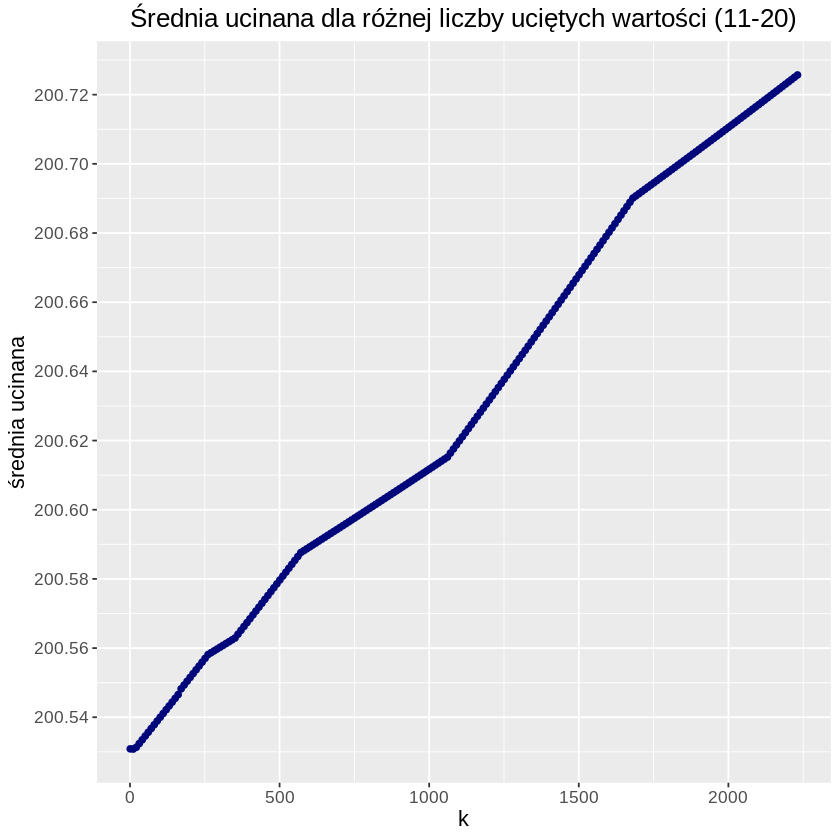

In [ ]:
k <- seq(1,floor(length(height2)/2),10)
y_axis_uc <- numeric()
i <- 1
for (n in 1:length(k)) {
    y_axis_uc[i]=średnia_ucinana(height2,i)
    i <- i+1
  }
df <- data.frame(x = k, 
                 y = y_axis_uc)
ggplot(df, aes(x=x, y=y)) +
  geom_point(col=niebieski) +
  labs(title="Średnia ucinana dla różnej liczby uciętych wartości (11-20)", x="k", y="średnia ucinana") +
  theme(text = element_text(size=13, family="Arial")) +
  theme(plot.title = element_text(hjust = 0.5)) +
  scale_y_continuous(breaks=seq(200,201,0.02)) +
  scale_x_continuous(breaks=seq(0,3000,500)) 

In [ ]:
kurtosis(height1)
kurtosis(height2)

[1] 3.16169

[1] 2.50648

In [ ]:
#skosnosc
skewness(height1)
skewness(height2)

[1] -0.4220651

[1] -0.3061048